## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 4</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:59 pm, 21 October, Friday, 2022 </center></h1>
#### All solutions must be in one pdf file except codes.

## **Question 1** (+30) (Probalistic linear regression )
Generating 6 data samples for the problem by this polynomial functions (use the below given code for create $x^i$)
$$ f(x) = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4$$
Then adding noise:
$y^i = f(x^i) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$, and noise level $\delta = 0.2$

The approximation model is 2nd order.

In assignment 3, question 3. We have computed the posterior distribution by using $\theta^*$ (the MAP point) to achieve the mean, and keep the variance the same as the noise level $\delta^2$. 

1. Instead of that, using Bayesian Predictions, finding the mean and variance of 
$$ P(y | x, \mathcal{D}) = \int_\theta P(y \mid x, \theta) P(\theta \mid \mathcal{D}) d\theta. $$

2. Plotting the the uncertainty band with the range of x [0,1] (Plotting training data samples will help answer the part Q1.3).
3. Discuss the result by comparing with the results that you achieved in assignment 3 (just using the MAP point).


[  4.44871077 -12.95284297  11.98438778]


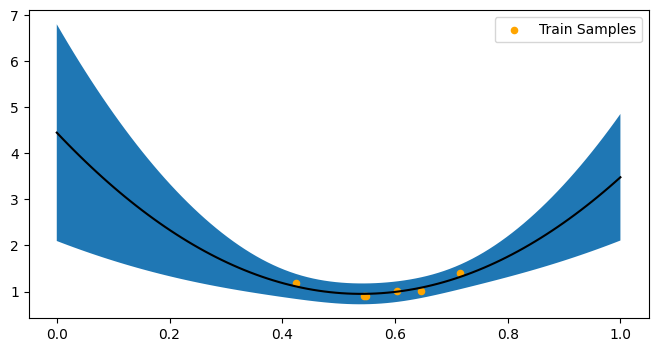

In [263]:
#1.2a : Beyasian Posterior
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
np.random.seed(0)

## please keep the below codes for generating x, DO NOT CHANGE!
# ==========================================================================================
n_train_samples = 6
X_train = np.sort(np.random.rand(n_train_samples)) 

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

Y_train = true_fn(X_train) + (np.random.randn(n_train_samples)) * 0.2

X_test = np.linspace(0., 1., 100)
Y_test = true_fn(X_test)
# print(X_test)
# plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
noise_level = 0.2
tau = 20
tau_squared = tau**2

def feature(X) :
    A = np.zeros((len(X), 3))
    for i in range(len(X)) :
        for j in range(3) :
            A[i][j] = X[i]**j
    return A

d = 1/(noise_level**2)
S = 1/tau_squared*np.identity(3) + d*(feature(X_train).T).dot(feature(X_train))
m = d*np.linalg.inv(S).dot(feature(X_train).T).dot(Y_train)
print(m)
mean = []
variance = []

mean = (feature(X_test)).dot(m)
variance = feature(X_test).dot(np.linalg.inv(S)).dot(feature(X_test).T)+noise_level**2
var_diag = np.diag(variance)
plt.plot(X_test,mean,'black')
plt.fill_between(X_test, mean+np.sqrt(var_diag), mean-np.sqrt(var_diag))
plt.scatter(X_train,Y_train, edgecolor='orange', s=20, facecolor = 'orange', label="Train Samples")
plt.legend()

In [ ]:
#1.1 in copy

Optimal theta values : [  4.44871077 -12.95284297  11.98438778]


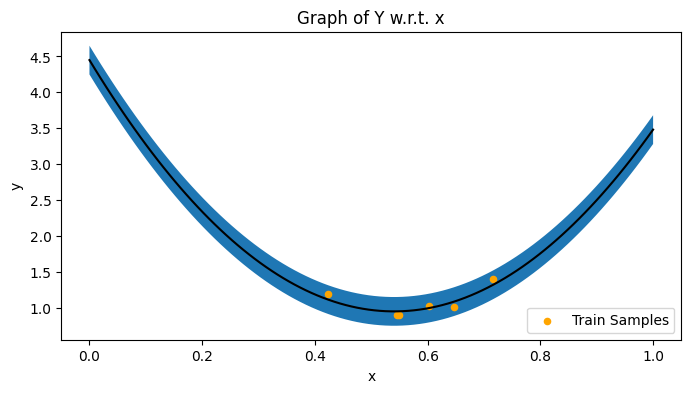

In [264]:
#1.2b : MAP method
sigma = noise_level
theta_best = np.linalg.inv(feature(X_train).T.dot(feature(X_train))+(sigma/tau)**2*np.identity(3)).dot(feature(X_train).T).dot(Y_train) 

print("Optimal theta values :" , theta_best)


def function(B): 
    C = []
    for i in range(3) :
        C.append(theta_best[i]*(B**i))
    return np.sum(C)

ypred = np.zeros((100))
#predicting new y for holdout data
for i in range(100) :
    
    ypred[i] = function(X_test[i])


#plotting predicted points and the holdout points
plt.plot(X_test,ypred,'black')
# plt.scatter(X_test,ypred, 'black', label='predicted Y')
plt.fill_between(X_test, ypred + sigma, ypred - sigma)
plt.scatter(X_train,Y_train, edgecolor='orange', s=20, facecolor = 'orange', label="Train Samples")
plt.legend()


plt.xlabel('x') 
plt.ylabel('y') 
  
plt.title("Graph of Y w.r.t. x")

plt.legend(loc="lower right")

In [ ]:
#1.3 : Clearly, Type 1 is better because we should get lower variance around the training samples.
#That is not the case in Type 2 where the uncertaininty band (+/- sigma) remains same throughout

## Question 2: (+30) (Generative VS Discriminative Models)

We are going to use the Iris flower dataset. We will use three features sepal length (cm), sepal width (cm), petal length (cm) to classify types of flowers in generative model.
1. Compute the emprical means and covariance matrices for each type of flowers.
2. Generating new flowers, denoted as set $S$, from the learned propability and plotting these generated flowers in 3D. Observe and discuss your results.
3. We assume that set $S$ is test data. Classify the test data $S$ using the generative model that you have found in question 1. Discuss you results.
4. We assume that set $S$ is test data. Using logistic regression to training the model, then verify the learn model with test data $S$. Compare and discuss your results with question 3.3

In [ ]:
#3.1 in copy

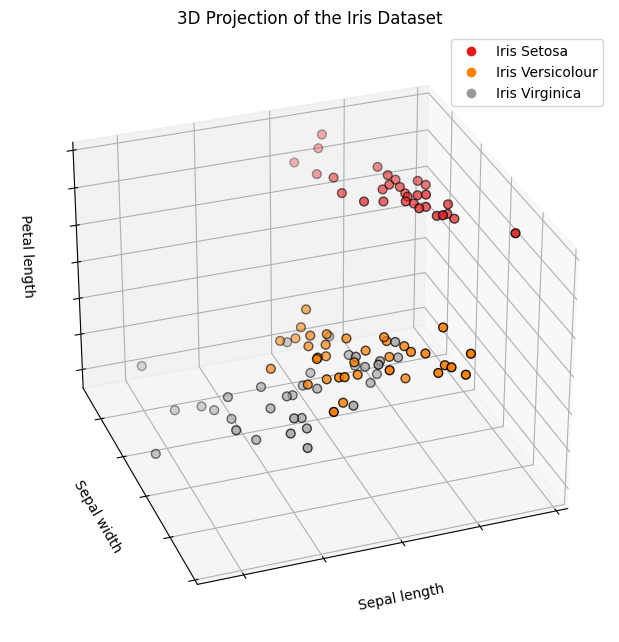

Percentage of outcome difference through two methods :  0.0
Percentage of misclassifications using generative model :  6.0
Percentage of misclassifications using logistic regression :  6.0


In [273]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
# Load the Iris dataset 
iris = datasets.load_iris(as_frame=True) 
 
# print part of the dataset 
iris_X, iris_y = iris.data, iris.target
input_data = pd.concat([iris_X, iris_y], axis=1)

X = iris_X.to_numpy()[:,:3]

# we can implement these formulas over the Iris dataset 
d = 3 # number of features in our toy dataset 
K = 3 # number of clases 
n = X.shape[0] # size of the dataset 
 
# these are the shapes of the parameters 
mus = np.zeros([K,d]) 
Sigmas = np.zeros([K,d,d]) 
phis = np.zeros([K]) 
 
# we now compute the parameters from the solution of the above optimization 
for k in range(3): 
    X_k = X[iris_y == k] 
    mus[k] = np.mean(X_k, axis=0) 
    Sigmas[k] = np.cov(X_k.T) 
    phis[k] = X_k.shape[0] / float(n) 

# print out the means 
# print(Sigmas)

#3.2

s = 100 # number of samples 
np.random.seed(1) 
                     
# STEP 1: we sample flower class based on phi 
ys = np.random.multinomial(n=1, pvals=phi, size=(s,)).argmax(axis=1) 
xs = np.zeros([s,d]) 
 
# STEP 2: sample flowers from each class 
for k in range(K): 
    nk = (ys==k).sum() 
    xs[ys==k,:] = np.random.multivariate_normal(mus[k], Sigmas[k], size=(nk,)) 

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA 
 
# let's visualize this dataset 
 
fig = plt.figure(1, figsize=(8, 6)) 
ax = Axes3D(fig, elev=-150, azim=110) 
ax.set_title("3D Projection of the Iris Dataset") 
ax.w_xaxis.set_ticklabels([]) 
ax.w_yaxis.set_ticklabels([]) 
ax.set_xlabel("Sepal length") 
ax.set_ylabel("Sepal width") 
ax.set_zlabel("Petal length") 
ax.w_zaxis.set_ticklabels([]) 
p1 = ax.scatter(xs[:, 0], xs[:, 1], xs[:, 2], c=ys, 
           cmap=plt.cm.Set1, edgecolor='k', s=40) 
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])
plt.show()

#3.3 
           
def gda_predictions(x, mus, Sigmas, phis):
    # adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1, n, d, 1))
    mus = np.reshape(mus, (K, 1, d, 1))
    Sigmas = np.reshape(Sigmas, (K, 1, d, d))    
    
    # compute probabilities
    py = np.tile(phis.reshape((K,1)), (1,n)).reshape([K,n,1,1])
    pxy = (np.sqrt(np.abs((2*np.pi)**d*np.linalg.det(Sigmas))).reshape((K,1,1,1))* -.5*np.exp(np.matmul(np.matmul((x-mus).transpose([0,1,3,2]), np.linalg.inv(Sigmas)), x-mus)))
    pyx = pxy * py
    return pyx.argmax(axis=0).flatten(), pyx.reshape([K,n])

idx, pyx = gda_predictions(xs, mus, Sigmas, phis)

           

#3.4
logreg = LogisticRegression(C=1e5, multi_class='multinomial') 
X_train = iris_X.to_numpy()[:,:3]
Target = iris_y.to_numpy()
logreg.fit(X_train, Target)  
predicted = logreg.predict(xs) 

print("Percentage of outcome difference through two methods : " , np. count_nonzero(predicted-idx)/s*100)
print("Percentage of misclassifications using generative model : ", np. count_nonzero(idx-ys)/s*100)
print("Percentage of misclassifications using logistic regression : ", np. count_nonzero(predicted-ys)/s*100)

#As can be seen from the data below, the two methods (3.3 and 3.4) produce the same results
#But, there is a 6% misclassification by both methods


## Question 3: (+20) (Bernoulli Naive Bayes Model)

1. From the lecture 8, we have the formula for the optimal value of $\psi_{jk}$
\begin{align*}
\psi_{jk} = \frac{n_{jk}}{n_k}.
\end{align*}
Derive this formula.
2. In lecture 8, we have classify the the document by bag of word method. We now make a simple comparison between BoW method and logistic regression. The training data: removing 2 class of type 2 and 3 from the data (the code is 4-class data). By that, our data becomes a binary classification problem. Performing BoW method and logistic regression method for the obtained 2-class data. Discussion the results.

In [ ]:
#4.1 in copy

In [281]:
#4.2
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# for this lecture, we will restrict our attention to just 4 different newsgroups:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# load the dataset
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# vectorize the training set
count_vect = CountVectorizer(binary=True, max_features=1000)
y_train = twenty_train.target
X_train = count_vect.fit_transform(twenty_train.data).toarray()
X_train.shape

categories = ['alt.atheism', 'sci.med']


# load the dataset
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# vectorize the training set
count_vect = CountVectorizer(binary=True, max_features=1000)
y_train = twenty_train.target
X_train = count_vect.fit_transform(twenty_train.data).toarray()
X_train.shape

n = X_train.shape[0] # size of the dataset 
d = X_train.shape[1] # number of features in our dataset 
K = 2 # number of clases 
 
# these are the shapes of the parameters 
psis = np.zeros([K,d]) 
phis = np.zeros([K]) 
 
# we now compute the parameters 
for k in range(K): 
    X_k = X_train[y_train == k] 
    psis[k] = np.mean(X_k, axis=0) 
    phis[k] = X_k.shape[0] / float(n) 

# print out the class proportions 


def nb_predictions(x, psis, phis): 
    """This returns class assignments and scores under the NB model. 
     
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y) 
    """ 
    # adjust shapes 
    n, d = x.shape 
    x = np.reshape(x, (1, n, d)) 
    psis = np.reshape(psis, (K, 1, d)) 
     
    # clip probabilities to avoid log(0) 
    psis = psis.clip(1e-14, 1-1e-14) 
     
    # compute log-probabilities 
    logpy = np.log(phis).reshape([K,1]) 
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis) 
    logpyx = logpxy.sum(axis=2) + logpy 
 
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n]) 
 
idx, logpyx = nb_predictions(X_train, psis, phis) 

# Applying Logistic Regression
logreg = LogisticRegression(C=1e5) 
logreg.fit(X_train_new, twenty_train_new.target)  
predicted = logreg.predict(X_train_new)

j, k, l, m,n,o = 0,0,0,0,0,0

for i in range(len(y_train)) :
    if y_train[i] == 0:
        j = j+1
        if y_train[i] != idx[i]:
            k = k+1
        if y_train[i] != predicted[i]:
            n = n+1
    if y_train[i] == 1:
        l = l+1
        if y_train[i] != idx[i]:
            m = m+1
        if y_train[i] != predicted[i]:
            o = o+1
                        
print(n,o)

print("Percentage of misclassifications using Naive Bayes model for class 1 and class 2 : ", k/j*100, ", ", m/l*100)
print("Percentage of misclassifications using Naive Bayes model for both classes : ", (k+m)/(j+l)*100)
print("Percentage of misclassifications using Logistics Regression model for class 1 and class 2 : ", n/j*100,", ", o/l*100)
print("Percentage of misclassifications using Logistics Regression model for both classes : ", (n+o)/(j+l)*100)

#Clearly the number of misclassification through Logistic Regression is zero
#And missclassification through Naive Bayes is very high, it is particularly high when missclassifying data for class 1
#It is still very low when missclassification is of Class 2

0 0
Percentage of misclassifications using Naive Bayes model for class 1 and class 2 :  4.375 ,  0.16835016835016833
Percentage of misclassifications using Naive Bayes model for both classes :  2.0484171322160147
Percentage of misclassifications using Logistics Regression model for class 1 and class 2 :  0.0 ,  0.0
Percentage of misclassifications using Logistics Regression model for both classes :  0.0
